In [28]:
# Import necessary libraries
from fnal import Dataset
from infn import INFNDataset
from utilities import plot_planes, plot_crate, plot_tpc, plot_wire_planes, plot_waveform
from toy_waveform_generator import generate_waveform, generate_component

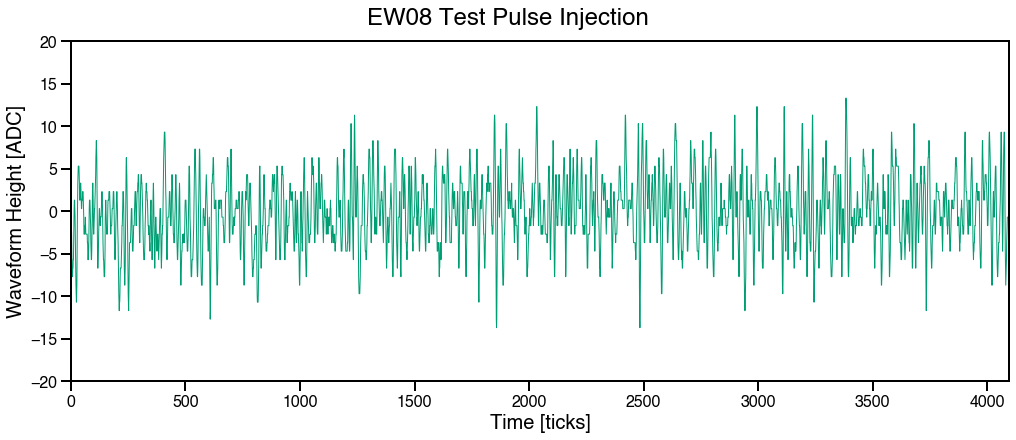

In [57]:
waveform = np.array([x.strip('\n').split(',') for x in open('/Volumes/MUSB/data/run10031_frag4626_evt9').readlines()])[64]
waveform = waveform.astype(float)
plot_waveform(waveform, 'EW08 Test Pulse Injection')

found noise data
found noise data


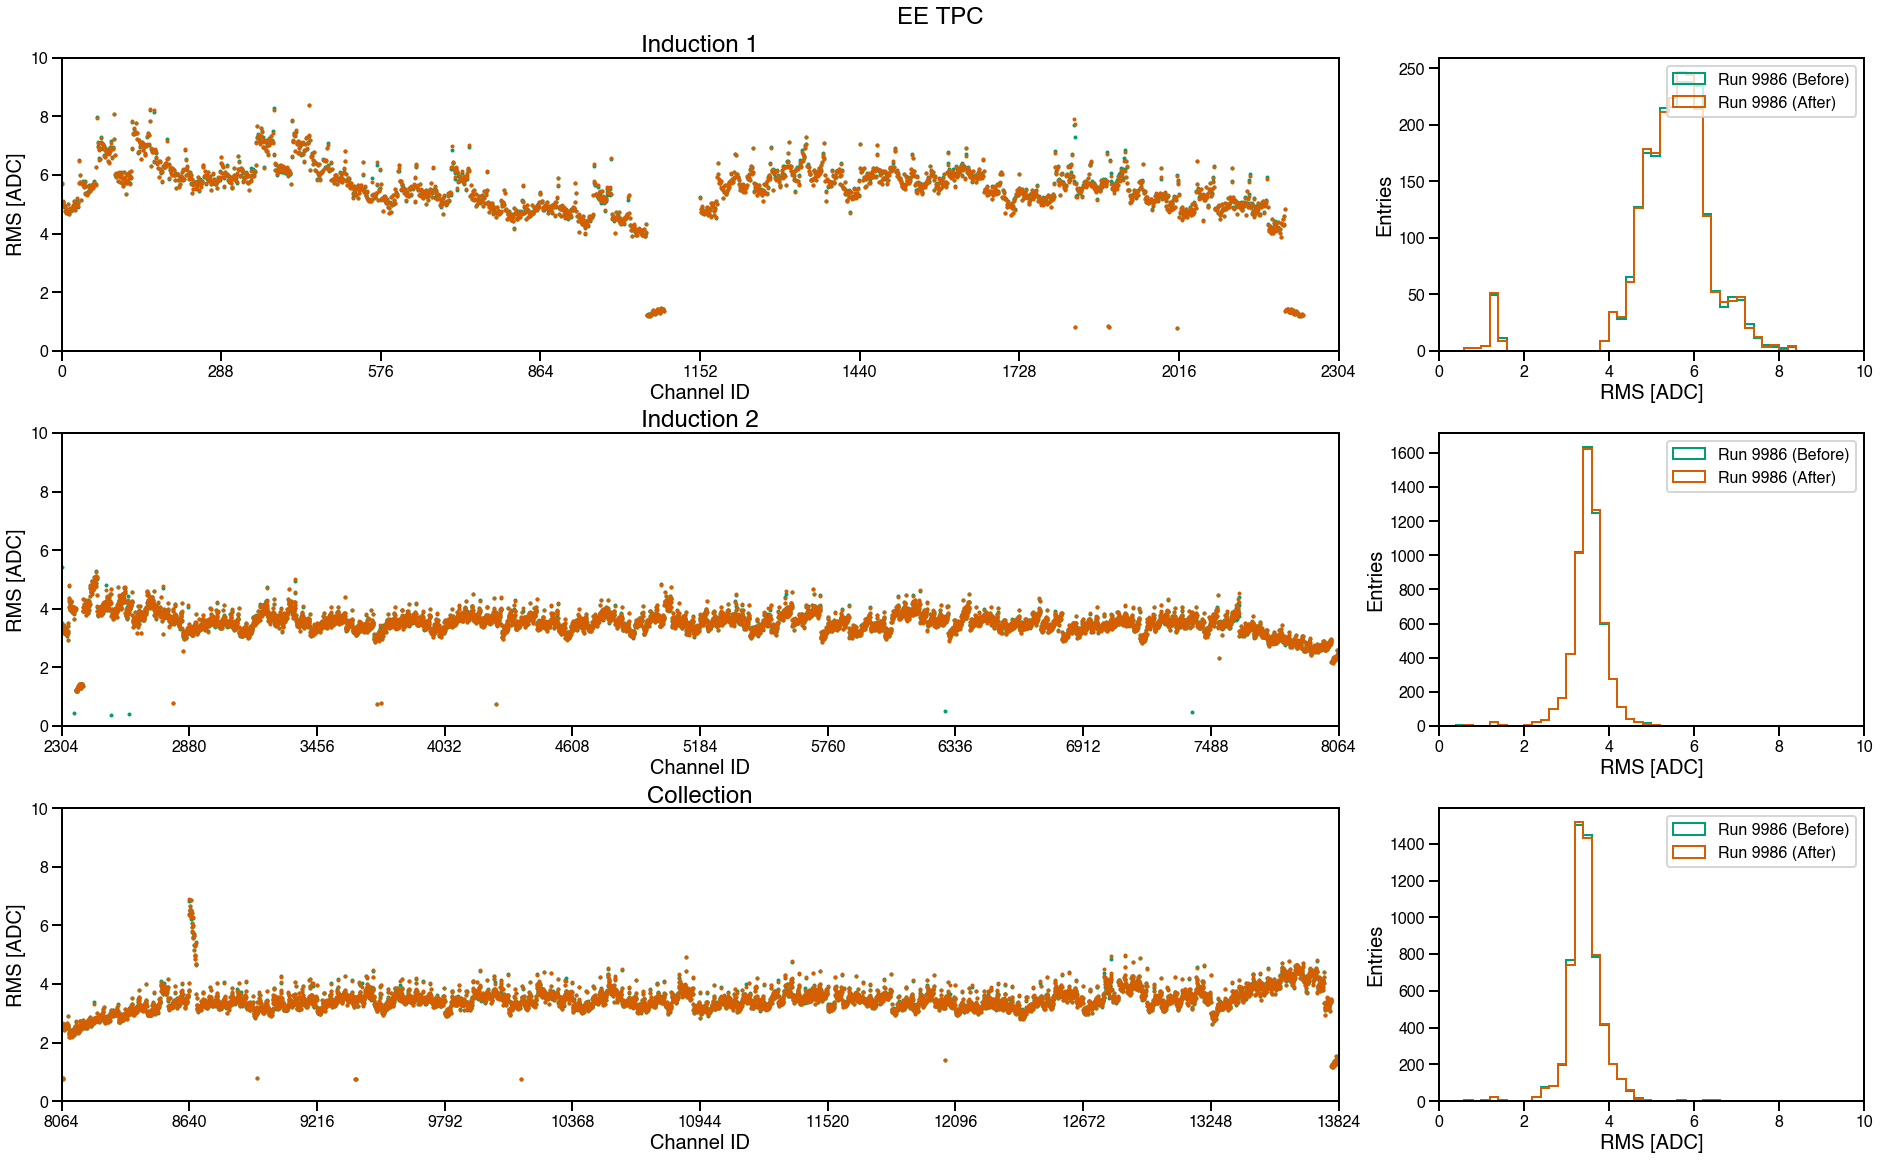

In [25]:
input_path = '/Volumes/MUSB/data'
data = [Dataset(input_path, x[0], suf=x[1]) for x in [(9986, 'before'), (9986, 'after')]]
labels = ['Run 9986 (Before)', 'Run 9986 (After)']

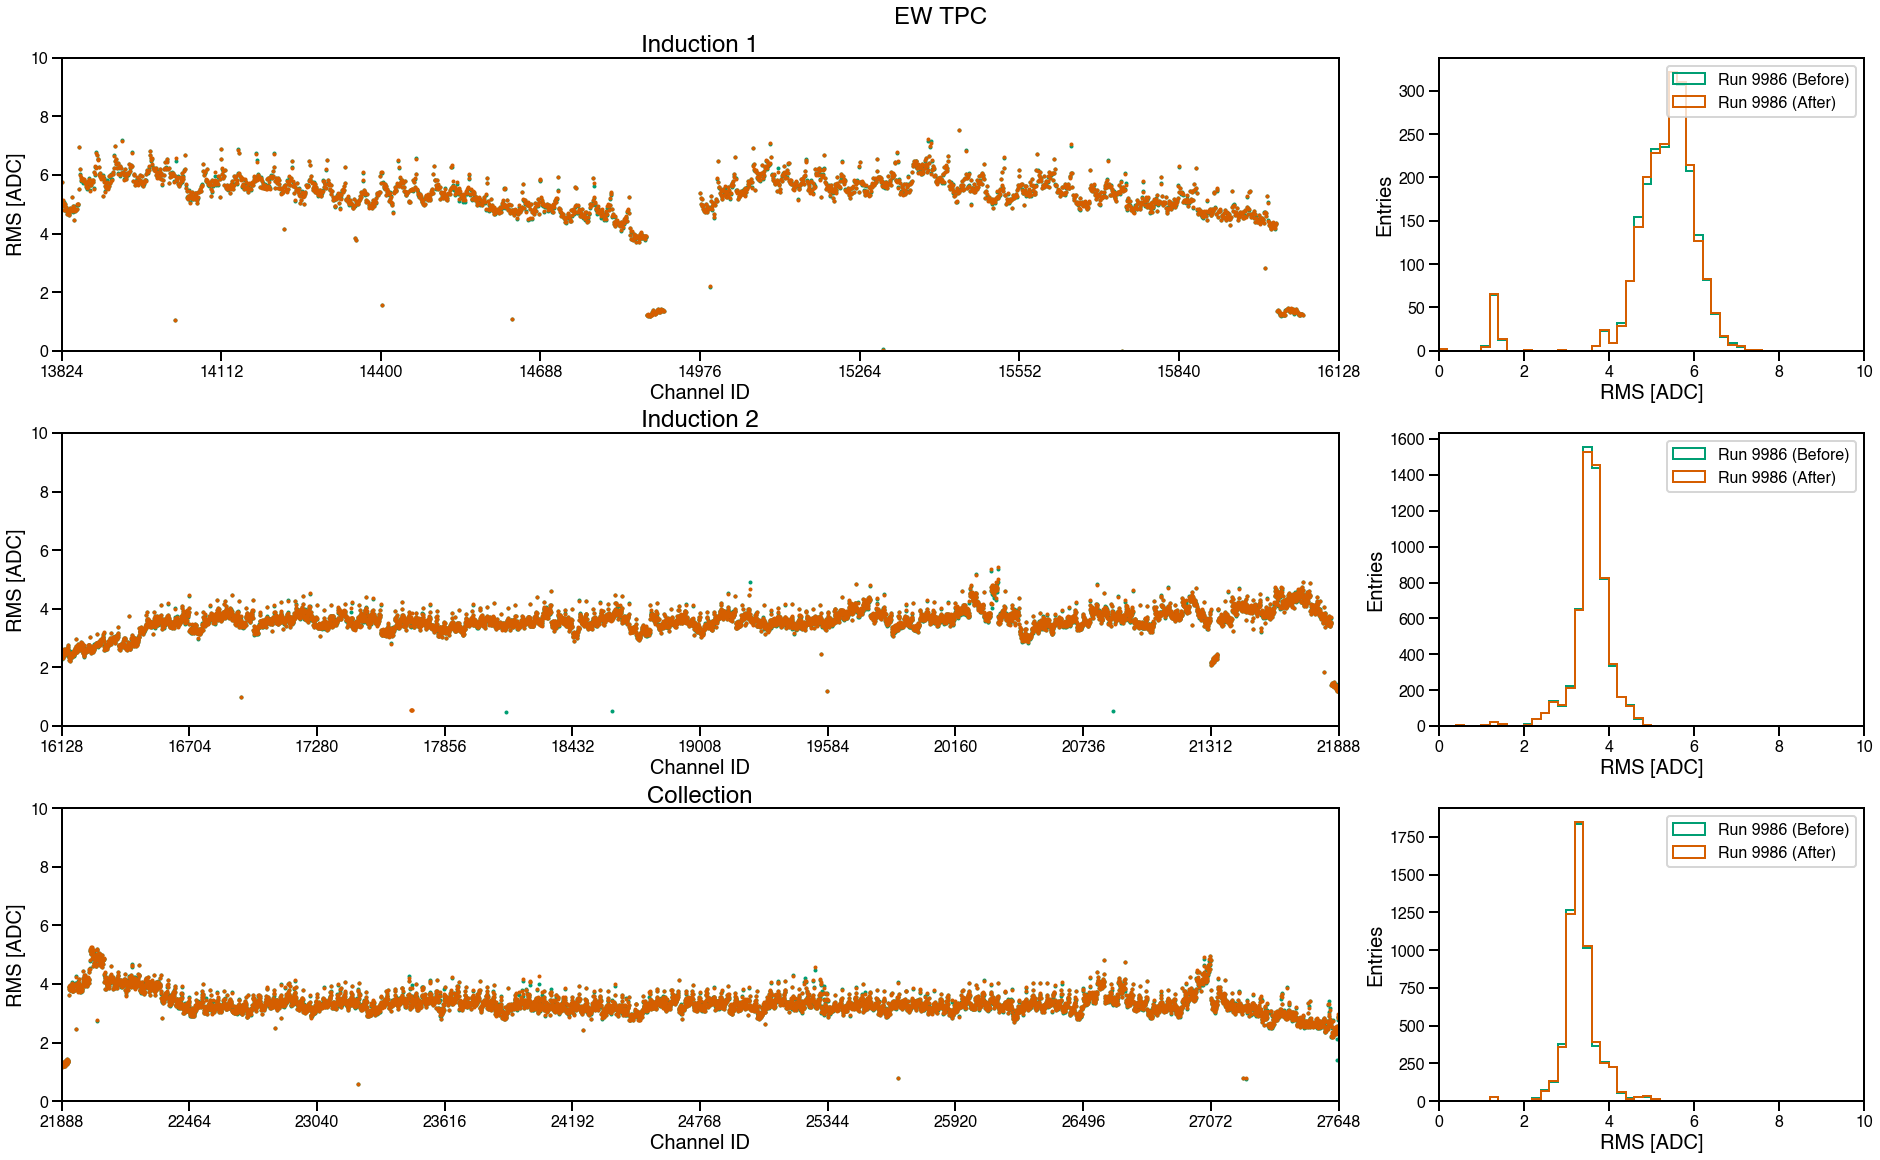

In [27]:
plot_tpc(data, labels, 'rawrms', 1)

found noise data
found noise data


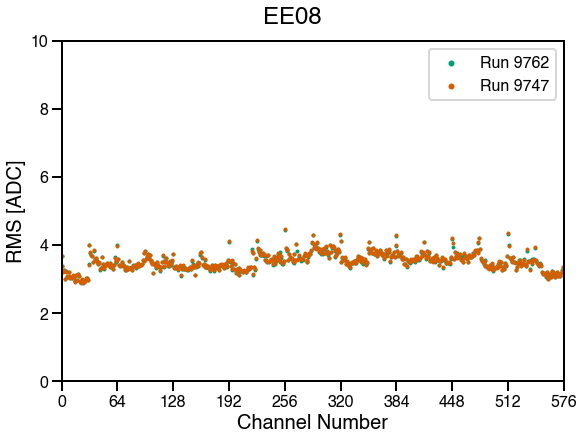

In [58]:
# Test plotting of mini-crate noise metrics.
input_path = '/Volumes/MUSB/data'
data = [Dataset(input_path, x) for x in [9762, 9747]]
labels = ['Run 9762', 'Run 9747']
plot_crate(data, labels, 'rawrms', 'EE08')

In [2]:
input_path = '/Volumes/MUSB/data'
data_nohv = Dataset(input_path, 9394)
waveforms, ffts = generate_component(data_nohv, 'EE05')

found noise data


In [3]:
import numpy as np
rffts = np.vstack([x[0,:] for x in ffts])
open('/Users/mueller/Downloads/rfft.bin', 'wb').write(rffts)
iffts = np.vstack([x[1,:] for x in ffts])
open('/Users/mueller/Downloads/ifft.bin', 'wb').write(iffts)
cffts = np.vstack([x[2,:] for x in ffts])
open('/Users/mueller/Downloads/cfft.bin', 'wb').write(cffts)
rffts[0,:]

array([1.0912848e+02, 1.8071290e+03, 8.2929370e+02, ..., 1.7386375e+01,
       1.7347038e+01, 2.4962500e+05], dtype=float32)

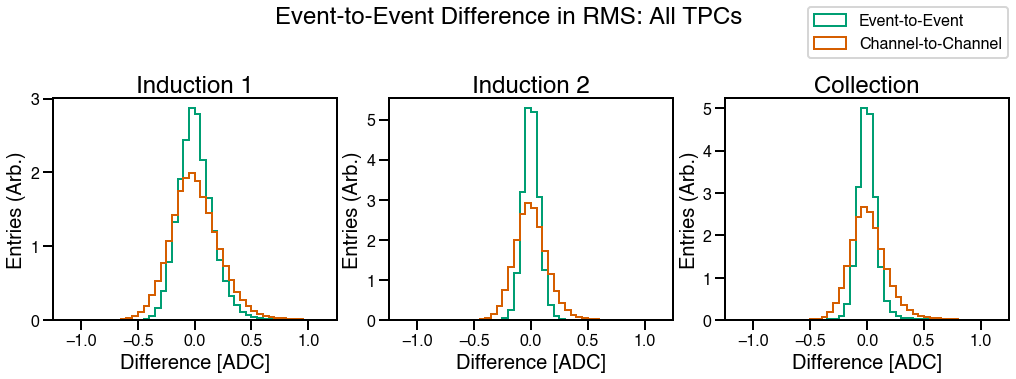

In [3]:
# Test plotting of RMS differences
plot_planes(data[0], 'intrms', ['e2eabs', 'c2cabs'])

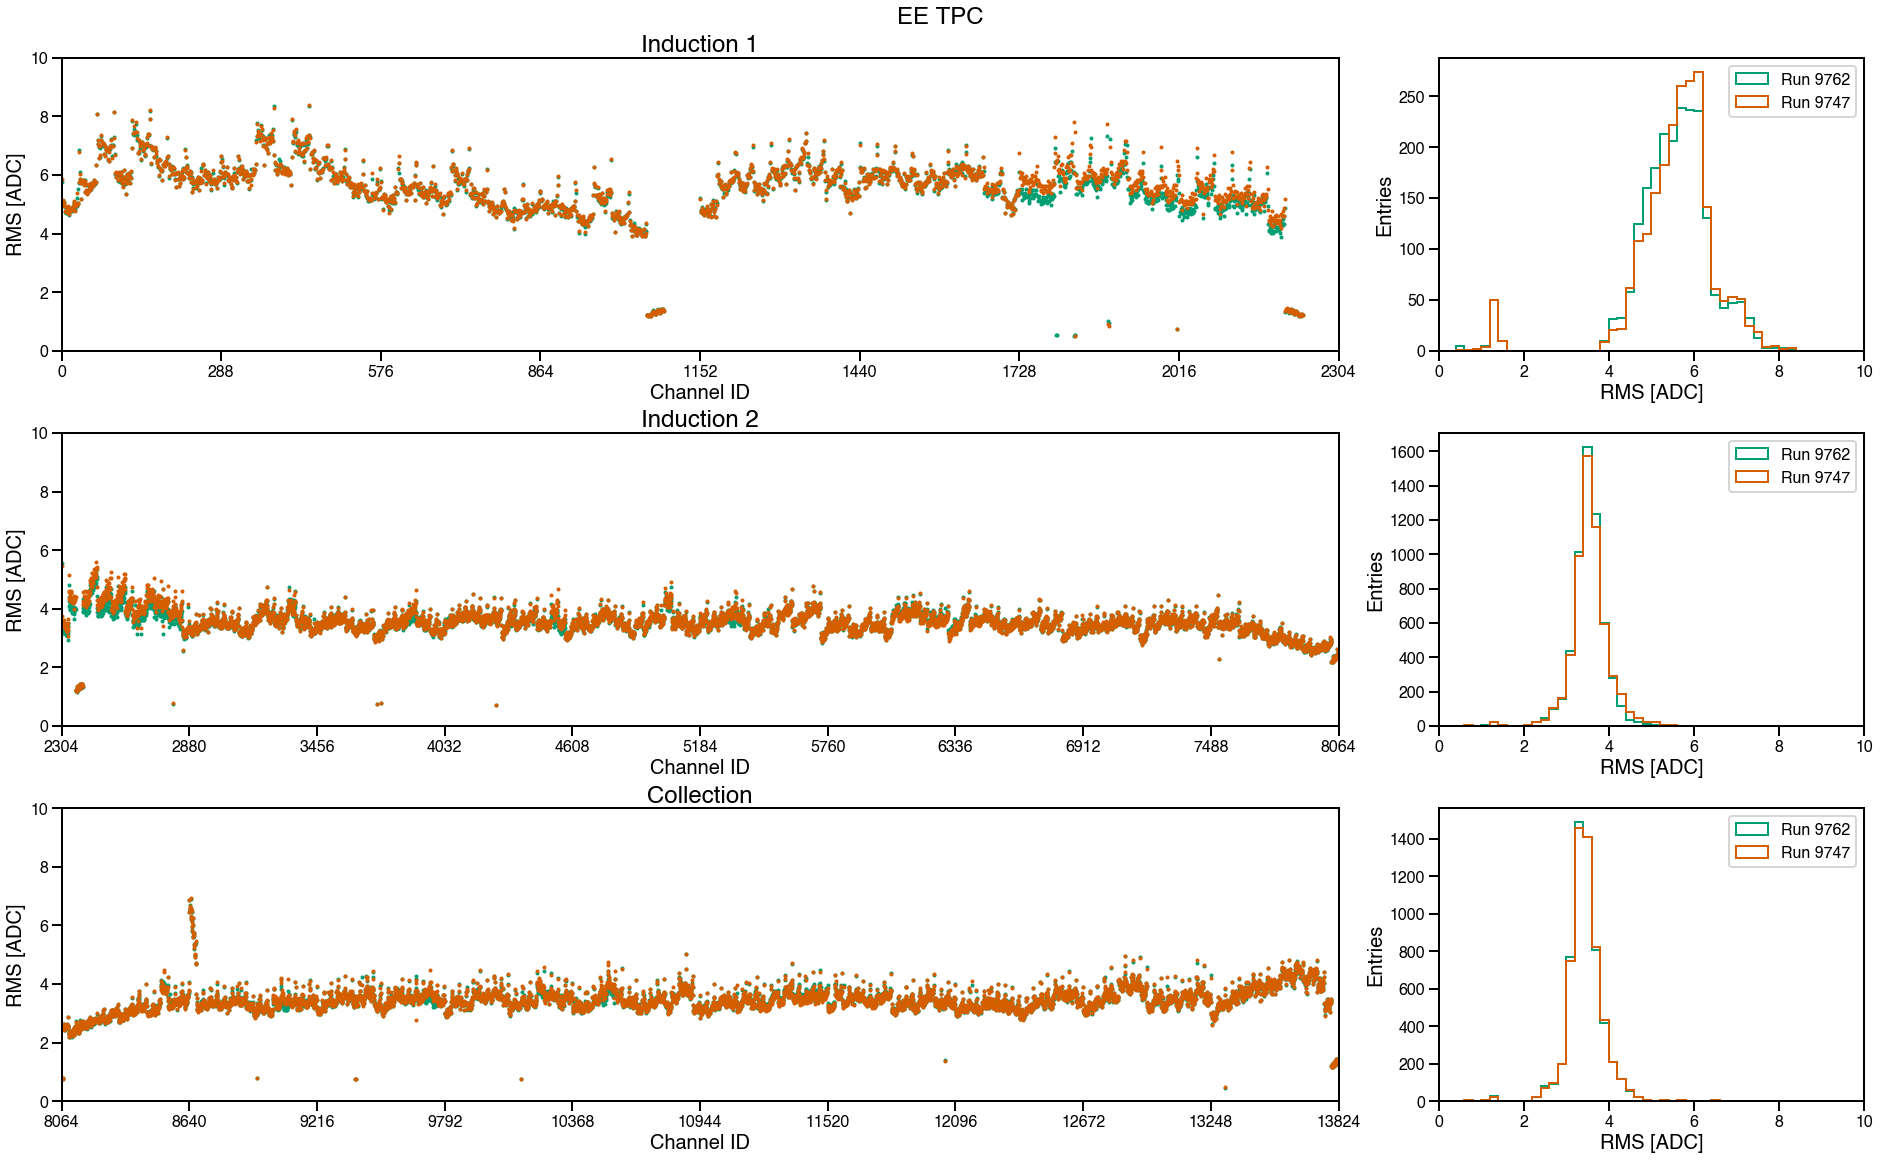

In [4]:
# Test plotting of the TPC noise metrics.
plot_tpc(data, labels, 'rawrms', 0)

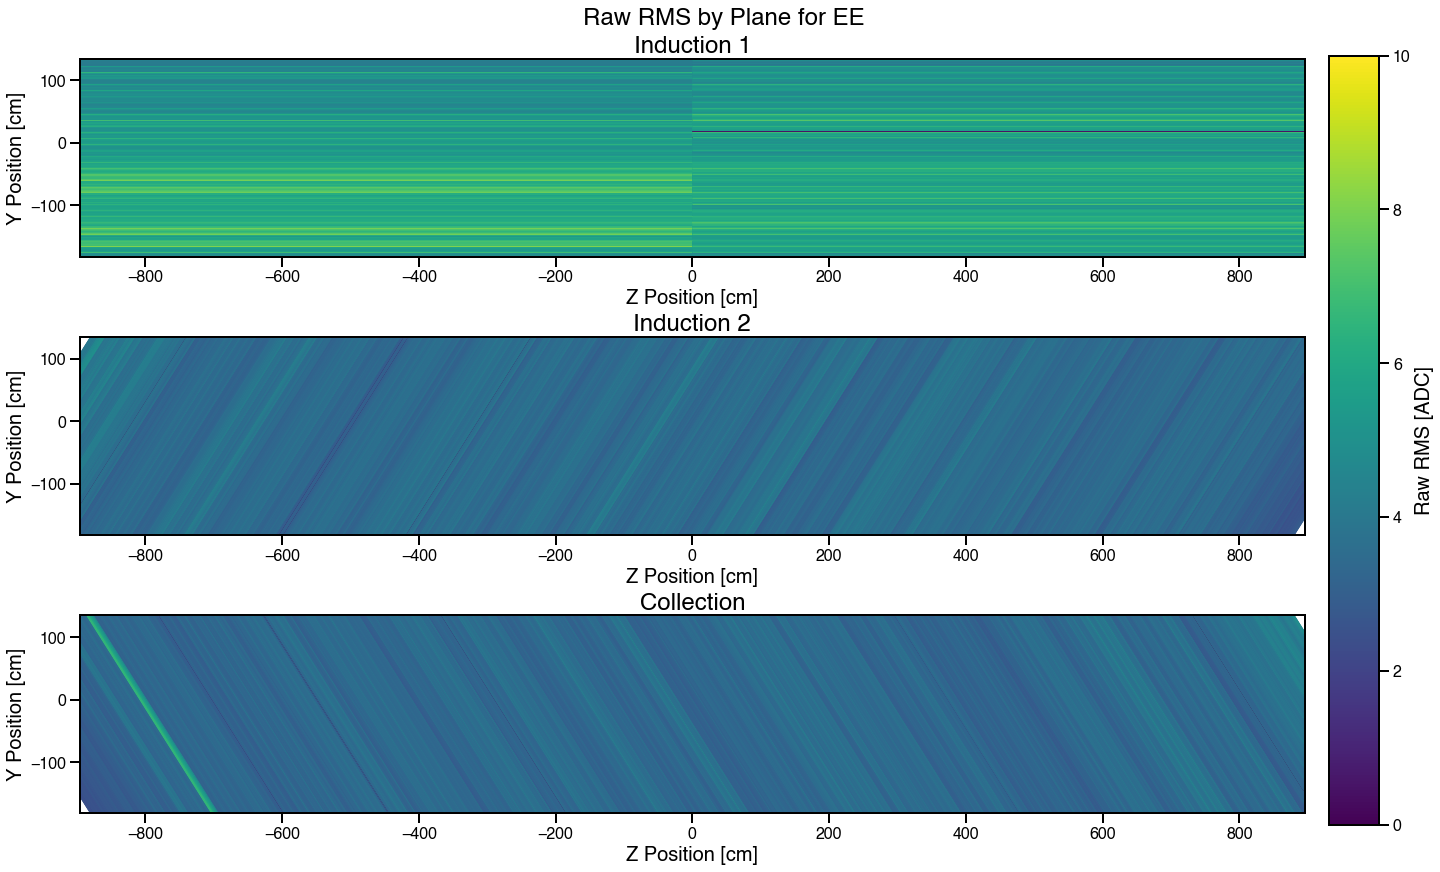

In [5]:
# Test plotting of the full TPC using a "plane-view"
plot_wire_planes(data[0], 'rawrms', 'Raw RMS [ADC]', 0)

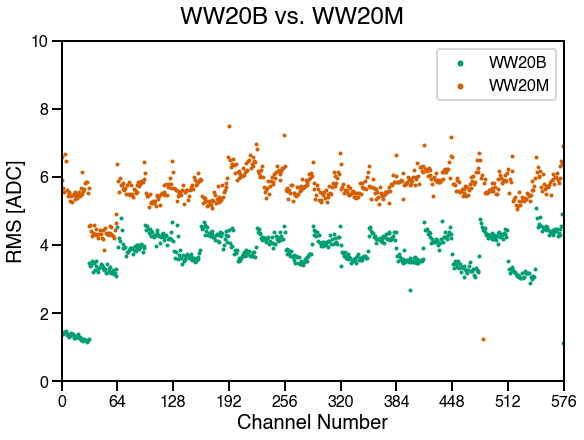

In [6]:
# Test plotting different components against each other.
data = [data[0], data[0]]
labels = ['WW20B', 'WW20M']
plot_crate(data, labels, 'rawrms', ['WW20B', 'WW20M'])

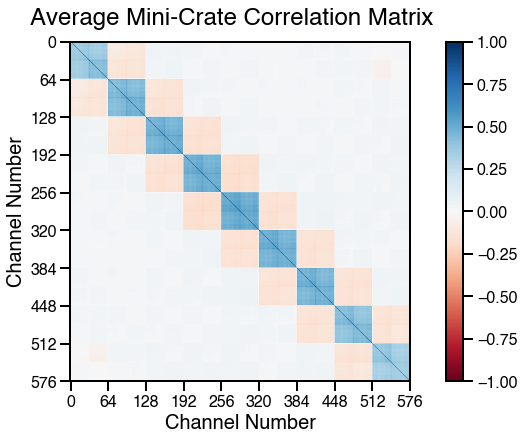

In [7]:
# Test correlation matrix for FNAL data.
data[0].plot_correlation_matrix('all')

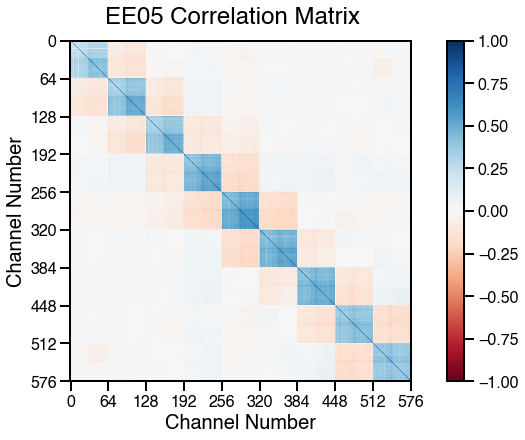

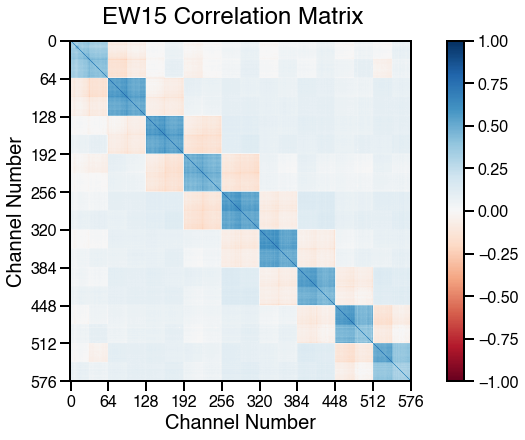

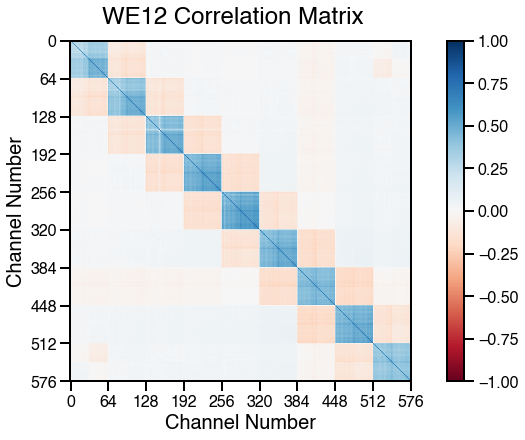

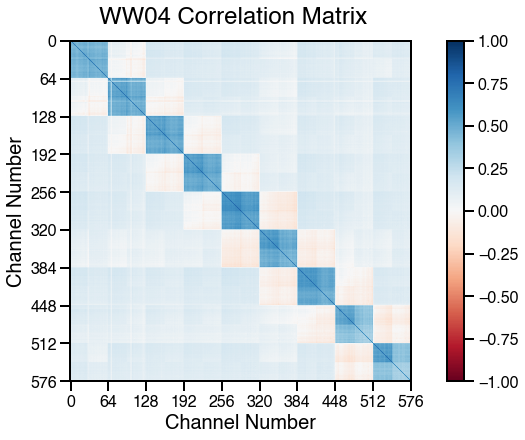

In [13]:
data[0].plot_correlation_matrix('EE05')
data[0].plot_correlation_matrix('EW15')
data[0].plot_correlation_matrix('WE12')
data[0].plot_correlation_matrix('WW04')

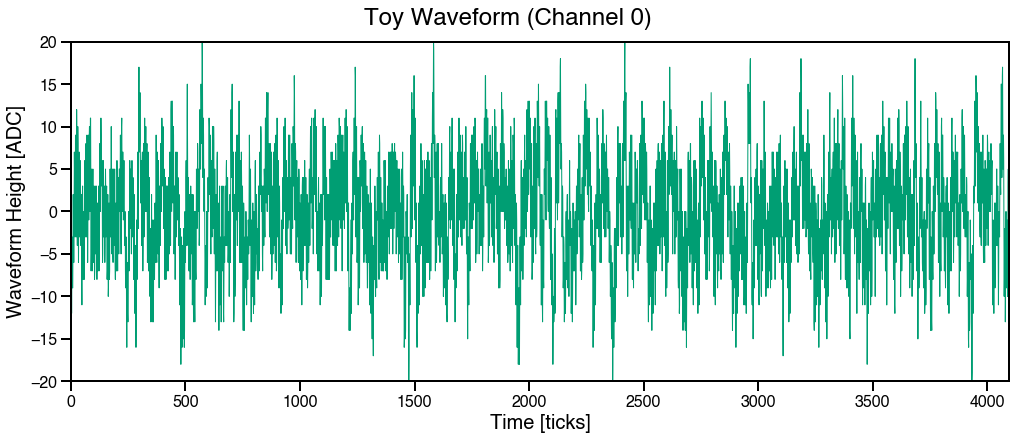

In [9]:
# Test toy waveform generation.
waveform = generate_waveform(data[0], 0)
plot_waveform(waveform, 'Toy Waveform (Channel 0)')

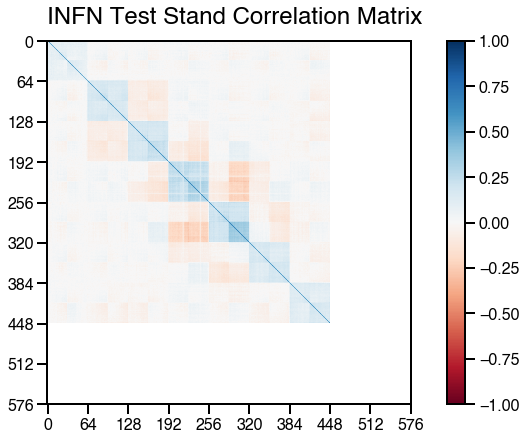

In [10]:
# Test INFN data parsing and noise analysis.
data_infn = INFNDataset('/Volumes/MUSB/infn_data/RUN_100264', 5)
data_infn.plot_correlation_matrix()

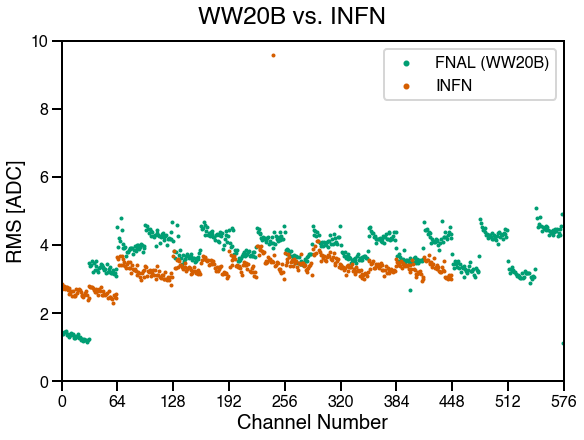

In [11]:
# Test comparison of INFN and FNAL data.
labels = 'FNAL (WW20B)', 'INFN'
plot_crate([data[0], data_infn], labels, 'rawrms', ['WW20B', 'INFN'])